**Demo for `teneva.func.demo.func_demo_alpine`**

---

This module contains analytical Alpine function for demo and tests.

## Loading and importing modules

In [1]:
import numpy as np
import teneva
from time import perf_counter as tpc
np.random.seed(42)

## Class `FuncDemoAlpine`

Alpine function for demo and tests.

In [2]:
X = np.array([
    [0., 0., 0.],
    [1., 1., 1.],
    [2., 2., 2.],
    [3., 3., 3.],
])

func = teneva.FuncDemoAlpine(d=X.shape[1])

print(func.get_f_poi(X))
print(func.get_f_poi(X[0]), func.get_f_poi(X[-1]))

[0.         2.82441295 6.05578456 2.17008007]
0.0 2.1700800725388047


Minimum value:

In [3]:
print(func.x_min)                   # Argument for exact minimum
print(func.get_f_poi(func.x_min))   # Computed minimum
print(func.y_min)                   # Value of exact minimum

[0. 0. 0.]
0.0
0.0


Let try to check the min-max values for 2D case by simple brute-force:

In [4]:
func = teneva.FuncDemoAlpine(d=2)
func.set_grid(n=10000, kind='uni')

I = teneva.grid_flat(func.n)
Y = func.get_f_ind(I).reshape(func.n, order='F')

i_min = np.unravel_index(np.argmin(Y), Y.shape)
i_max = np.unravel_index(np.argmax(Y), Y.shape)

x_min = teneva.ind_to_poi(i_min, func.a, func.b, func.n)
x_max = teneva.ind_to_poi(i_max, func.a, func.b, func.n)

y_min = func.get_f_poi(x_min)
y_max = func.get_f_poi(x_max)

print(f'Function   : {func.name}')
print(f'y_min real = {func.y_min:-13.7e}; x_min real = {func.x_min}')
print(f'y_min appr = {y_min:-13.7e}; x_min appr = {x_min}')
print(f'y_max appr = {y_max:-13.7e}; x_max appr = {x_max}')

Function   : Alpine
y_min real = 0.0000000e+00; x_min real = [0. 0.]
y_min appr = 1.6937783e-04; x_min appr = [-0.1010101 -0.1010101]
y_max appr = 1.7430405e+01; x_max appr = [7.99179918 7.99179918]


We can plot the function for 2D case:

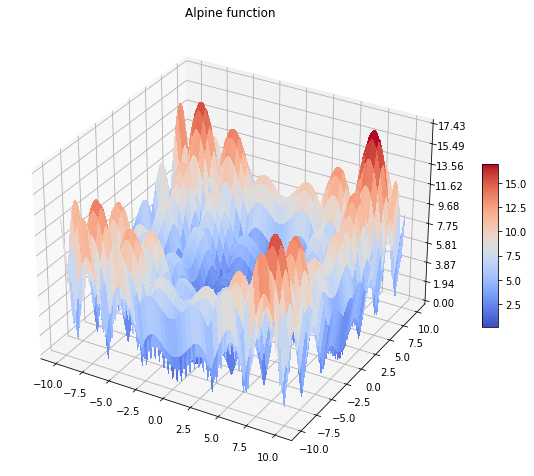

In [5]:
teneva.FuncDemoAlpine(d=2).plot()

Note that for this function, we can construct the TT-cores of its TT-decomposition explicitly:

In [6]:
func = teneva.FuncDemoAlpine(d=100)
func.set_grid(n=2**14, kind='uni')
func.cores()

We can check the accuracy of approximation:

In [7]:
func.build_tst_ind(m=1.E+4)
func.check()
func.info()

Alpine          [CORES        ] > error: 2.8e-16 | rank:  2.0 | time:   0.137


And we can also check the accuracy of its minimum (i.e. the real minimum value compared to the value of the nearest element of the TT-tensor):

In [8]:
y_min_real = func.y_min
x_min_real = func.x_min
i_min_real = teneva.poi_to_ind(x_min_real, func.a, func.b, func.n, func.kind)
y_min_appr = func.get_ind(i_min_real)

print(f'Function   : {func.name}')
print(f'y_min real = {y_min_real:-13.7e}')
print(f'y_min appr = {y_min_appr:-13.7e}')

Function   : Alpine
y_min real = 0.0000000e+00
y_min appr = 6.1411456e-03


It is also possible to calculate the function in the PyTorch format:

In [9]:
func = teneva.FuncDemoAlpine(d=10)

x1 = func.a + np.random.uniform(size=func.d) * (func.b - func.a)
y1 = func._calc(x1)

import torch
# torch.set_default_dtype(torch.float64)

x2 = torch.tensor(x1)
y2 = func._calc_pt(x2)

print(y1)
print(y2.numpy())

19.031578926729928
19.031578926729928


---